### The Plant Growth R dataset ### 
contains results from an experiment to compare yields (as measured by dried weight of plants) obtained under a control and two different treatment conditions. It is a data frame of 30 cases on 2 variables.

The dataset contains the following three columns of 30 cases on 2 variables:

rownames: The row identifiers;

weight: The weight of the plants;

group: The treatment group, which includes three levels: ctrl, trt1, and trt2.


In [20]:
import pandas as pd

# Load the dataset to inspect its contents
file_path = 'plantgrowth.csv'
plant_growth_data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
plant_growth_data.head()


,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


As per the above, this dataset consists of measurements of plant weights (in grams) categorized into three treatment groups: ‘ctrl’ (control), ‘trt1’ (treatment 1), and ‘trt2’ (treatment 2). Dataset can be used for analysing the effects of different treatments on plant growth. It contains two primary variables:

## Weight: A numeric variable representing the weight of plants.

 ## Group: A categorical variable representing the treatment group.

Plant Growth R data set is being analysed using T-test wich is a statistical test used to compare the means of two groups to determine whether they are significantly different from each other. It calculates the t-statistic, which measures the size of the difference relative to the variation in the sample data.The t test is a parametric test of difference, meaning that it makes the same assumptions about your data as other parametric tests.



![t test photo.webp](<attachment:t test photo.webp>)
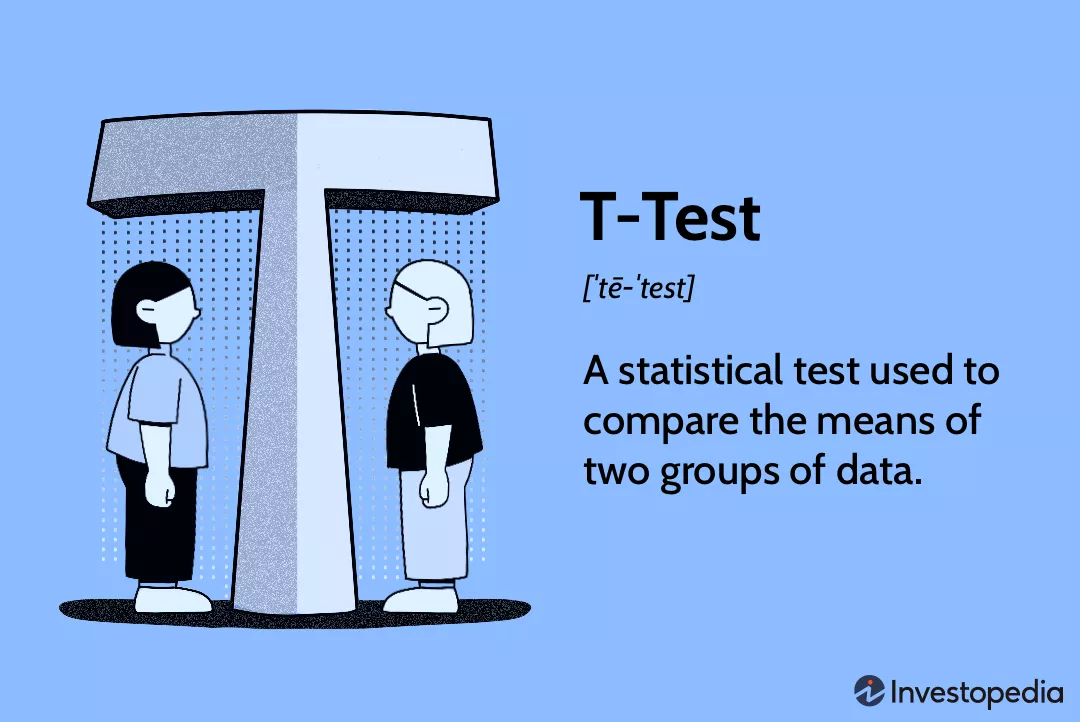

A t-test compares the average values of two data sets and determines if they came from the same population.

Four assumptions are made while using a t-test:

1. The data collected must follow a continuous or ordinal scale.

2. The data is collected from a randomly selected portion of the total population

Independence: The observations in each group are independent of each other

3. The data will result in a normal distribution of a bell-shaped curve.

Normality: The data in each group is approximately normally distributed

4. Equal or homogenous variance exists when the standard variations are equal.

Homogeneity of Variances: The variances of the two groups are equal (for the two-sample t-test).

Mathematically, the t-test takes a sample from each of the two sets and establishes the problem statement. It assumes a null hypothesis, which means that it assumes the two means are equal.

Using the t-test formulas, values are calculated and compared against the standard values. This comparison helps to determine the effect of chance on the difference, and whether the difference is outside that chance range. The t-test questions whether the difference between the groups represents a true difference in the study or merely a random difference.

Based on the results, the assumed null hypothesis is accepted or rejected. If the null hypothesis is rejected, it indicates that data readings are strong and are probably not due to chance.

# If Null hypothesis are rejected: Differences are statistically significant
# If Null hypothesis are accepted: Differences are not statistically significant

## Using the T-Test
Calculating a t-test requires three fundamental data values:

1. The difference between the mean values from each data set, also known as the mean difference
2. The standard deviation of each group
3. The number of data values of each group

The t-test produces two values as its output: t-value and degrees of freedom. The t-value, or t-score, is a ratio of the difference between the mean of the two sample sets and the variation that exists within the sample sets.

The numerator value is the difference between the mean of the two sample sets. The denominator is the variation that exists within the sample sets and is a measurement of the dispersion or variability.

This calculated t-value is then compared against a value obtained from a critical value table called the T-distribution table. Higher values of the t-score indicate that a large difference exists between the two sample sets. The smaller the t-value, the more similarity exists between the two sample sets.

In [21]:
#Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2
#importing required libraries
from scipy.stats import ttest_ind
from statsmodels.stats.anova import AnovaRM
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Extracting data for t-test (trt1 vs trt2)
trt1_weights = plant_growth_data[plant_growth_data['group'] == 'trt1']['weight']
trt2_weights = plant_growth_data[plant_growth_data['group'] == 'trt2']['weight']

# Perform independent t-test
t_test_result = ttest_ind(trt1_weights, trt2_weights)

#Show result
t_test_result



TtestResult(statistic=np.float64(-3.0100985421243616), pvalue=np.float64(0.0075184261182198574), df=np.float64(18.0))

Performing a t-test (trt1 vs. trt2):
We performed a t-test to compare the means of the treatment groups ‘trt1’ and ‘trt2’.

* t-statistic (-3.01): The t-statistic is the ratio of the observed difference between the means to the standard error of the difference. A negative value indicates that the mean of ‘trt1’ is smaller than the mean of ‘trt2’.

* p-value (0.0075): This represents the probability of observing a t-statistic as extreme as -3.01 (or more extreme) under the null hypothesis that the two group means are equal. Since the p-value is below the significance threshold of 0.05, it provides strong evidence against the null hypothesis.

Conclusion: The significant p-value indicates that there is a statistically significant difference in plant weights between treatment groups ‘trt1’ and ‘trt2’. Specifically, plants in the ‘trt2’ group have higher weights than those in the ‘trt1’ group.

The treatment applied in ‘trt2’ may have a more beneficial effect on plant growth compared to ‘trt1’, leading to heavier plant weights. Further analysis or replication would help confirm this finding and explore potential causes for this difference.

## Since the p-value is less than 0.05, we can reject the null hypothesis. There is a significant difference in the mean weights of plants between treatment groups trt1 and trt2.

## ANOVA (Analysis of Variance) is a statistical method used to compare the means of three or more groups. It tests the null hypothesis that all group means are equal versus the alternative that at least one group mean is different.

## Key Assumptions of ANOVA:

Independence: Observations are independent.

Normality: Residuals (errors) are approximately normally distributed.

Homogeneity of Variances: Variance among the groups is approximately equal.

In [22]:
# Prepare data for ANOVA
anova_model = ols('weight ~ C(group)', data=plant_growth_data).fit()
anova_result = sm.stats.anova_lm(anova_model, typ=2)

# Display results
anova_result

,sum_sq,df,F,PR(>F)
C(group),3.76634,2.0,4.846088,0.01591
Residual,10.49209,27.0,NaN,NaN


The p-value is less than 0.05, so we reject the null hypothesis. There is a significant difference in the mean weights of plants among the three groups (ctrl, trt1, and trt2).

## Why ANOVA Instead of Multiple t-tests?
Using multiple t-tests to compare more than two groups increases the risk of Type I error (false positives). Each t-test operates under a 5% significance threshold, meaning there is a 5% chance of incorrectly rejecting the null hypothesis for each test. When multiple t-tests are performed, these individual error rates compound, greatly increasing the overall likelihood of false positives.

ANOVA addresses this issue by comparing all group means simultaneously under a single null hypothesis. By doing so, it controls the overall Type I error rate, ensuring reliable statistical conclusions. If ANOVA detects significant differences, post-hoc tests (e.g., Tukey’s HSD) can be applied to identify specific group differences without inflating the error rate.